# Import data of the industry 
from the perspective of payment_amount, view_count,convention_rate and advertising fee

In [179]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/after_clean.csv',index_col = None, encoding = 'gb18030')

C:\Users\13917109271\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
data['OrderTime'] = pd.to_datetime(data['OrderTime'])
data['PayTime'] = pd.to_datetime(data['PayTime'])
data['DeliveredTime'] = pd.to_datetime(data['DeliveredTime'])
# create new col: time window between PaytTime & OrderTime
data['OrderToPay(s)'] = (data['PayTime'] - data['OrderTime']).astype('timedelta64[s]')
# create new col: time 
data['PayToReceive(h)'] = (data['DeliveredTime'] - data['PayTime']).astype('timedelta64[h]')

In [4]:
excellent_payment_amount = [[2017,8,300766],[2017,9,268919],[2017,10,231100],[2017,11,381938],[2017,12,323107],
                  [2018,1,314732],[2018,2,182211],[2018,3,296708],[2018,4,259451],[2018,5,364607],
                  [2018,6,355321],[2018,7,357994],[2018,8,409112],[2018,9,361518],[2018,10,344064],[2018,11,498062],
                  [2018,12,460035],[2019,1,395456],[2019,2,299989],[2019,3,365981],[2019,4,335556],
                  [2019,5,418450],[2019,6,316545]]

average_payment_amount = [[2017,8,213675],[2017,9,180691],[2017,10,155361],[2017,11,256130],[2017,12,227572],
                   [2018,1,209429],[2018,2,120317],[2018,3,197909],[2018,4,186440],[2018,5,244298],
                   [2018,6,232010],[2018,7,250811],[2018,8,281516],[2018,9,256647],[2018,10,234571],
                   [2018,11,344893],[2018,12,320763],[2019,1,268417],[2019,2,202224],[2019,3,251131],
                   [2019,4,233499],[2019,5,272901],[2019,6,210169]]

excellent_view_count = [[2017,8,173931],[2017,9,138438],[2017,10,134606],[2017,11,193768],[2017,12,154619],
                  [2018,1,157413],[2018,2,120345],[2018,3,148101],[2018,4,125594],[2018,5,141412],
                  [2018,6,142020],[2018,7,164316],[2018,8,187370],[2018,9,154759],[2018,10,175340],
                  [2018,11,212596],[2018,12,192076],[2019,1,183337],[2019,2,179527],
                  [2019,3,178862],[2019,4,177142],[2019,5,182135],[2019,6,157187]]

average_view_count = [[2017,8,100230],[2017,9,74885],[2017,10,72665],[2017,11,98999],[2017,12,76362],
               [2018,1,80478],[2018,2,57998],[2018,3,74096],[2018,4,67236],[2018,5,73419],
                [2018,6,75429],[2018,7,87338],[2018,8,99806],[2018,9,82116],[2018,10,90074],
                [2018,11,112136],[2018,12,95180],[2019,1,86973],[2019,2,86342],
                [2019,3,91134],[2019,4,79997],[2019,5,89195],[2019,6,74565]]

excellent_conversion_rate = [[2017,8,0.054],[2017,9,0.0554],[2017,10,0.0524],[2017,11,0.056],[2017,12,0.0579],
                           [2018,1,0.0575],[2018,2,0.047],[2018,3,0.0619],[2018,4,0.062],[2018,5,0.0682],
                           [2018,6,0.0673],[2018,7,0.0653],[2018,8,0.0655],[2018,9,0.069],[2018,10,0.0675],
                          [2018,11,0.0742],[2018,12,0.0722],[2019,1,0.0668],[2019,2,0.0624],[2019,3,0.0688],
                          [2019,4,0.0705],[2019,5,0.071],[2019,6,0.0697]]

average_conversion_rate = [[2017,8,0.0265],[2017,9,0.0295],[2017,10,0.0271],[2017,11,0.031],[2017,12,0.0312],
                         [2018,1,0.0316],[2018,2,0.0243],[2018,3,0.0339],[2018,4,0.0336],[2018,5,0.039],
                         [2018,6,0.036],[2018,7,0.034],[2018,8,0.0344],[2018,9,0.0366],[2018,10,0.034],
                         [2018,11,0.0401],[2018,12,0.0396],[2019,1,0.0362],[2019,2,0.0309],[2019,3,0.0364],
                          [2019,4,0.0358],[2019,5,0.0382],[2019,6,0.0372]]

excellent_advertising_fee = [[2017,8,35899],[2017,9,30498],[2017,10,31910],[2017,11,39351],[2017,12,34908],
                            [2018,1,33828],[2018,2,19234],[2018,3,31986],[2018,4,33536],[2018,5,43895],
                            [2018,6,43778],[2018,7,43512],[2018,8,43364],[2018,9,39295],[2018,10,42594],
                            [2018,11,54724],[2018,12,46435],[2019,1,42145],[2019,2,30593],[2019,3,40873],
                            [2019,4,40557],[2019,5,42032],[2019,6,34852]]

average_advertising_fee = [[2017,8,14153],[2017,9,13095],[2017,10,12926],[2017,11,15514],[2017,12,14385],
                            [2018,1,14421],[2018,2,7281],[2018,3,13557],[2018,4,14237],[2018,5,17891],
                            [2018,6,18090],[2018,7,18464],[2018,8,18132],[2018,9,16464],[2018,10,17299],
                            [2018,11,19206],[2018,12,17596],[2019,1,16065],[2019,2,11749],[2019,3,16344],
                            [2019,4,15594],[2019,5,16994],[2019,6,14016]]


In [5]:
def f(in_df):
    df = in_df.copy(deep=True)
    df['year'] = df['year'].apply(lambda x: str(x))
    df['month'] = df['month'].apply(lambda x: str(x))
    def f(x):
        return (x['year']+'-'+x['month'])
    df['year_month'] = df.apply(f,axis=1)
    return df

In [6]:
excellent_payment_amount = pd.DataFrame(excellent_payment_amount)
excellent_payment_amount.columns = ["year","month","value"]
excellent_payment_amount = f(excellent_payment_amount)

average_payment_amount = pd.DataFrame(average_payment_amount)
average_payment_amount.columns = ["year","month","value"]
average_payment_amount = f(average_payment_amount)

excellent_view_count = pd.DataFrame(excellent_view_count)
excellent_view_count.columns = ["year","month","value"]
excellent_view_count = f(excellent_view_count)

average_view_count = pd.DataFrame(average_view_count)
average_view_count.columns = ["year","month","value"]
average_view_count = f(average_view_count)

excellent_conversion_rate = pd.DataFrame(excellent_conversion_rate)
excellent_conversion_rate.columns = ["year","month","value"]
excellent_conversion_rate = f(excellent_conversion_rate)

average_conversion_rate = pd.DataFrame(average_conversion_rate)
average_conversion_rate.columns = ["year","month","value"]
average_conversion_rate = f(average_conversion_rate)

excellent_advertising_fee = pd.DataFrame(excellent_advertising_fee)
excellent_advertising_fee.columns = ["year","month","value"]
excellent_advertising_fee = f(excellent_advertising_fee)

average_advertising_fee = pd.DataFrame(average_advertising_fee)
average_advertising_fee.columns = ["year","month","value"]
average_advertising_fee = f(average_advertising_fee)

In [21]:
data['year'] = data['PayTime'].apply(lambda x: x.year if x.year >2000 else '')
data['month'] = data['PayTime'].apply(lambda x: x.month if x.year >2000 else '')
data = f(data)

In [32]:
data['year'] = data['year'].apply(lambda x: int(x) if x !='' else 0 )
data['month'] = data['month'].apply(lambda x: int(x) if x !='' else 0)

In [164]:
my_total_payment_amount = pd.DataFrame(data[(data['year']>= 2017) & (data['OrderStatus'] == '交易成功')].groupby('year_month').sum().iloc[:,:1])
my_total_payment_amount = my_total_payment_amount.reset_index(inplace = False,drop= False)

In [165]:
df1 = pd.merge(excellent_payment_amount,average_payment_amount, on ='year_month')
df2 = pd.merge(df1,my_total_payment_amount, on ='year_month')
#df2 merge the total_payment_amount of the top, average and our store level
df2

,year_x,month_x,value_x,year_month,year_y,month_y,value_y,OwnedAmount
0,2017,8,300766,2017-8,2017,8,213675,543394.30
1,2017,9,268919,2017-9,2017,9,180691,225218.86
2,2017,10,231100,2017-10,2017,10,155361,125806.40
3,2017,11,381938,2017-11,2017,11,256130,286356.62
4,2017,12,323107,2017-12,2017,12,227572,224014.78
5,2018,1,314732,2018-1,2018,1,209429,232775.89
6,2018,2,182211,2018-2,2018,2,120317,121247.70
7,2018,3,296708,2018-3,2018,3,197909,127290.80
8,2018,4,259451,2018-4,2018,4,186440,124336.00
9,2018,5,364607,2018-5,2018,5,244298,243464.03


C:\Users\13917109271\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning:

Second argument 'y3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.



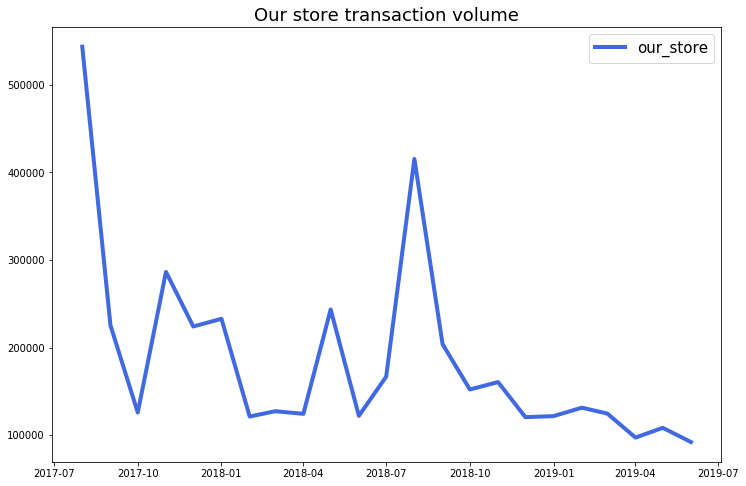

In [600]:
# draw the line of total amount of our 
# Data
df=pd.DataFrame({'x':pd.to_datetime(df2['year_month']), 'y1': df2['value_x'], 'y2': df2['value_y'],'y3':df2[ 'OwnedAmount']})
 
# multiple line plot
plt.figure(figsize=(12,8))
plt.title('Our store transaction volume',fontsize = 18)
plt.plot( 'x', 'y3', data=df, marker='', color='royalblue',linewidth=4, label="our_store")
plt.legend(loc='upper right',prop={'size':15})
plt.show()

C:\Users\13917109271\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning:

Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.

C:\Users\13917109271\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning:

Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.

C:\Users\13917109271\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning:

Second argument 'y3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.



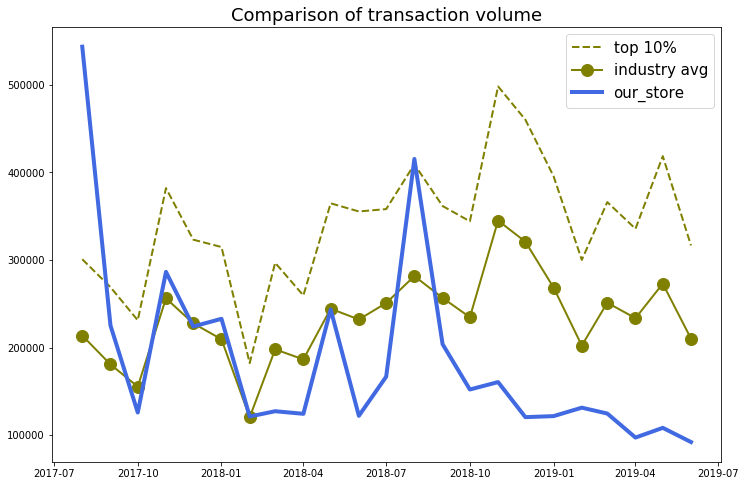

In [598]:
# draw the line of total amount of our 
# Data
df=pd.DataFrame({'x':pd.to_datetime(df2['year_month']), 'y1': df2['value_x'], 'y2': df2['value_y'],'y3':df2[ 'OwnedAmount']})
 
# multiple line plot
plt.figure(figsize=(12,8))
plt.title('Comparison of transaction volume',fontsize = 18)
plt.plot( 'x', 'y1', data=df, marker='', color='olive',linestyle='dashed',linewidth=2, label="top 10%")
plt.plot( 'x', 'y2', data=df, marker='o',markerfacecolor='olive', markersize=12, color='olive',linewidth=2,label="industry avg")
plt.plot( 'x', 'y3', data=df, marker='', color='royalblue',linewidth=4, label="our_store")
plt.legend(loc='upper right',prop={'size':15})
plt.show()

In [505]:
#寻找和行业差距的比较
df2['gap_to_top'] = (df2['value_x'] - df2['OwnedAmount'])/df2['OwnedAmount']
df2['gap_to_average'] = (df2['value_y'] - df2['OwnedAmount'])/df2['OwnedAmount']

C:\Users\13917109271\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\13917109271\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



C:\Users\13917109271\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning:

Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.

C:\Users\13917109271\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning:

Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.



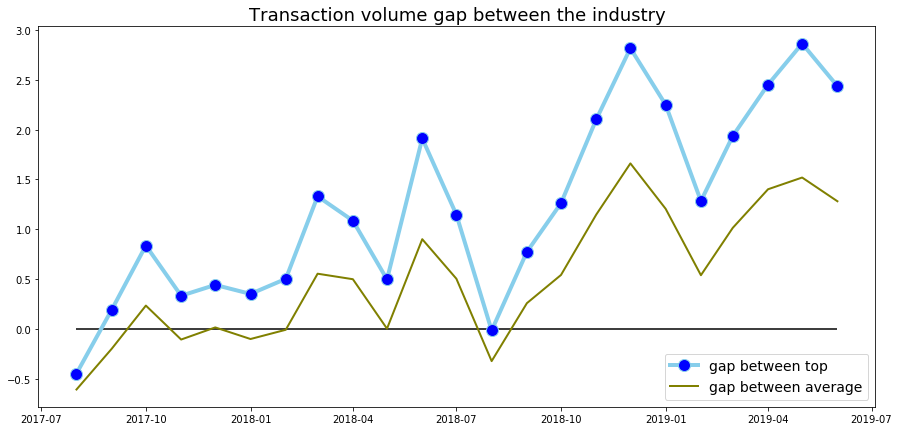

In [510]:
# Data
df=pd.DataFrame({'x':pd.to_datetime(df2['year_month']), 'y1': df2['gap_to_top'], 'y2': df2['gap_to_average']})
 
# multiple line plot
plt.figure(figsize=(15,7))
plt.title('Transaction volume gap between the industry',fontsize = 18)
plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue',linewidth=4, label="gap between top")
plt.plot( 'x', 'y2', data=df, marker='', color='olive',linewidth=2, label="gap between average")
plt.legend(loc='lower right',prop={'size':14})

plt.hlines(0,df.x.min(),df.x.max())
plt.show()

In [346]:
#check the average transaction value

In [333]:
transaction_number = pd.DataFrame(data[(data['year']>= 2017) & (data['OrderStatus'] == '交易成功')].groupby(data['year_month'],as_index = False).size())
transaction_number =transaction_number.reset_index(inplace = False,drop= False)
transaction_number.columns=['year_month','transaction_amount']

In [354]:
df2 = df2.drop(['transaction_amount_x','transaction_amount_y'],axis=1)

In [358]:
df2['average_transaction_value']= df2['OwnedAmount']/df2['transaction_amount']

C:\Users\13917109271\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [388]:
df2.head()

,year_x,month_x,value_x,year_month,year_y,month_y,value_y,OwnedAmount,gap_to_top,gap_to_average,transaction_amount,average_transaction_value
0,2017,8,300766,2017-8,2017,8,213675,543394.30,-0.806701,-1.543088,4709,115.394840
1,2017,9,268919,2017-9,2017,9,180691,225218.86,0.162503,-0.246431,1403,160.526629
2,2017,10,231100,2017-10,2017,10,155361,125806.40,0.455619,0.190232,778,161.704884
3,2017,11,381938,2017-11,2017,11,256130,286356.62,0.250254,-0.118013,1904,150.397384
4,2017,12,323107,2017-12,2017,12,227572,224014.78,0.306685,0.015631,1727,129.713248


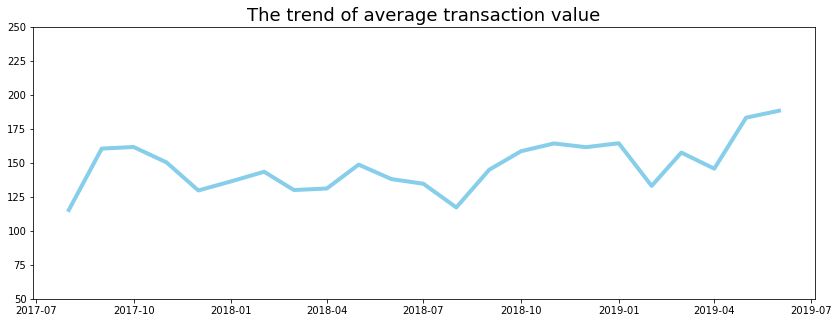

In [394]:
x = pd.to_datetime(df2['year_month'])
y = df2['average_transaction_value']

plt.figure(figsize=(14,5))
plt.title('The trend of average transaction value',fontsize = 18)
plt.plot(x, y,color='skyblue',linewidth=4)
plt.ylim([50,250])
plt.show()

In [395]:
# check the trend of transaction amount

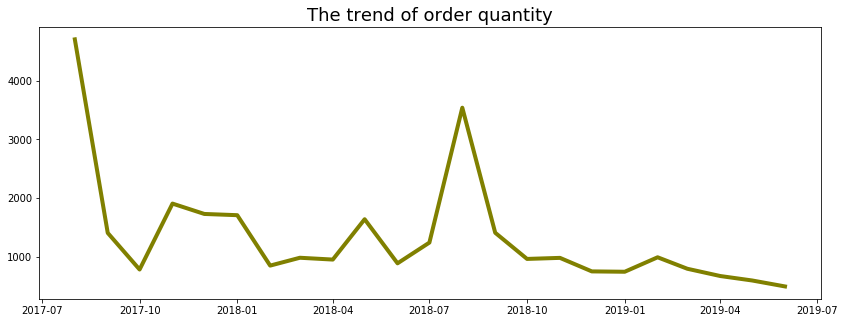

In [553]:
x = pd.to_datetime(df2['year_month'])
y = df2['transaction_amount']

plt.figure(figsize=(14,5))
plt.title('The trend of order quantity',fontsize = 18)
plt.plot(x, y,color='olive',linewidth=4)
# plt.ylim([50,250])
plt.show()

## 发现客单价基本不变，用户下单量下降
-check 下单量和客户访问量下降有关
-虽然客户访问量下降，但如果访问店铺的人转化为客户的比例高，还是可以促进销量的
-所以看一下店铺的用户转换率
-转换率非常低， 如果提升 1% 按照店铺平均客单价计算，可以达到行业平水平，提升多少，可以达到行业10%水平。

In [657]:
df5 = df3.rename({'OwnedAmount':'transaction_volume','transaction_amount':'order_quantity','my_view_count':'my_visitor_volume','value_x':'top_transaction_volume','value_y':'average_transaction_volume'},axis=1)
df5 = df3.rename({'OwnedAmount':'txn_volume','transaction_amount':'order_quantity','my_view_count':'visitor_volume','value_x':'top_txn_volume','value_y':'avg_txn_volume','gap_to_top':'gap_top','gap_to_average':'gap_avg','average_transaction_value':'avg_txn_value'},axis=1)
df5 = df5.drop(['year_x','month_x','year_y','month_y','top_txn_volume','avg_txn_volume','gap_top','gap_avg'],axis=1)
df5.corr()['order_quantity']

txn_volume        0.989362
order_quantity    1.000000
avg_txn_value    -0.643054
visitor_volume    0.956070
Name: order_quantity, dtype: float64

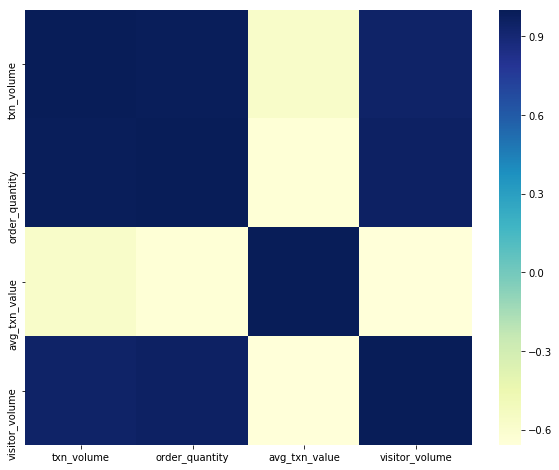

In [661]:
data = df5
correlations = data.corr()

fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.heatmap(correlations,ax=ax, cmap= "YlGnBu") 
plt.show()
#发现 orde quantity 和visitor volume 相关性很大

In [415]:
# excellent_view_count & average_view_count
my_view_count = [[2017,8,174213],[2017,9,75383],[2017,10,41172],[2017,11,81290],[2017,12,80056],
                         [2018,1,103644],[2018,2,77570],[2018,3,58385],[2018,4,52498],[2018,5,87973],
                         [2018,6,60085],[2018,7,73485],[2018,8,127896],[2018,9,65813],[2018,10,52723],
                         [2018,11,50924],[2018,12,45358],[2019,1,45434],[2019,2,48187],[2019,3,50687],
                          [2019,4,49370],[2019,5,51654],[2019,6,34932]]
my_view_count = pd.DataFrame(my_view_count)
my_view_count.columns = ["year","month","my_view_count"]
my_view_count = f(my_view_count)
my_view_count = my_view_count.drop(["year","month"],axis = 1)

In [417]:
df3 = pd.merge(df2,my_view_count, on ='year_month')

In [423]:
df3.head()

,year_x,month_x,value_x,year_month,year_y,month_y,value_y,OwnedAmount,gap_to_top,gap_to_average,transaction_amount,average_transaction_value,my_view_count
0,2017,8,300766,2017-8,2017,8,213675,543394.30,-0.806701,-1.543088,4709,115.394840,174213
1,2017,9,268919,2017-9,2017,9,180691,225218.86,0.162503,-0.246431,1403,160.526629,75383
2,2017,10,231100,2017-10,2017,10,155361,125806.40,0.455619,0.190232,778,161.704884,41172
3,2017,11,381938,2017-11,2017,11,256130,286356.62,0.250254,-0.118013,1904,150.397384,81290
4,2017,12,323107,2017-12,2017,12,227572,224014.78,0.306685,0.015631,1727,129.713248,80056


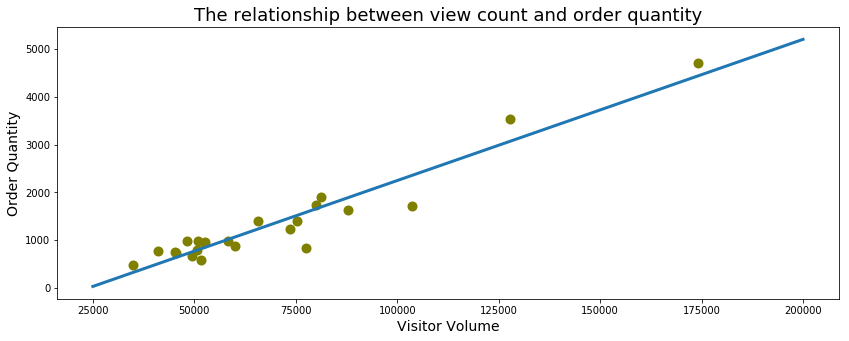

In [557]:
y = df3['transaction_amount']
x = df3['my_view_count']
linrange = np.linspace(2.5e4,2e5)

plt.figure(figsize=(14,5))
plt.title('The relationship between view count and order quantity',fontsize = 18)
# plt.xtitle('the transaction ')
plt.scatter(x, y,color='olive',linewidth=4)
plt.plot(linrange,np.poly1d(np.polyfit(x,y,1))(linrange),linewidth=3)
plt.xlabel("Visitor Volume",fontsize = 14)
plt.ylabel("Order Quantity",fontsize = 14)
# plt.ylim([50,250])
plt.show()
#得到 vistor colume 和order quantity的关系

In [ ]:
# 为了提升visitor volume  两个方法：
#1.提升 visitor volume
#2. 提升斜率 order quantity/ visotr volume (per visitor order quantity) 
#方法一的成本更高，所以我们focus on 提升斜率
#提升 per visit order quantity : 1.more percentage visitor become our customer 2. per customer buy more products(fred product mix)
# My concentrastion 

# Conversion rate issue

In [463]:
# already get excellent_conversion_rate and average_conversion_rate
# now to get my conversion rate = customer who buy products each month/ visit customer
customer_amount = data[(data['OrderStatus']=='交易成功')& (data['year']>=2017)].groupby('year_month').agg({'AlipayAccount': lambda x: x.nunique()})
conversion_rate = pd.merge(my_view_count,customer_amount,on='year_month')
conversion_rate['my_conversion_rate'] = conversion_rate['AlipayAccount']/conversion_rate['my_view_count']

In [483]:
#for excellent
excellent_conversion_rate = excellent_conversion_rate.drop(['year','month'],axis=1)
excellent_conversion_rate.columns= ['excellent_conversion_rate','year_month']

#for average
average_conversion_rate = average_conversion_rate.drop(['year','month'],axis=1)
average_conversion_rate.columns= ['average_conversion_rate','year_month']

In [487]:
df4 = pd.merge(excellent_conversion_rate,average_conversion_rate, on = 'year_month')

In [493]:
df4 = pd.merge(df4,conversion_rate,on = 'year_month')

C:\Users\13917109271\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning:

Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.

C:\Users\13917109271\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning:

Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.

C:\Users\13917109271\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning:

Second argument 'y3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.



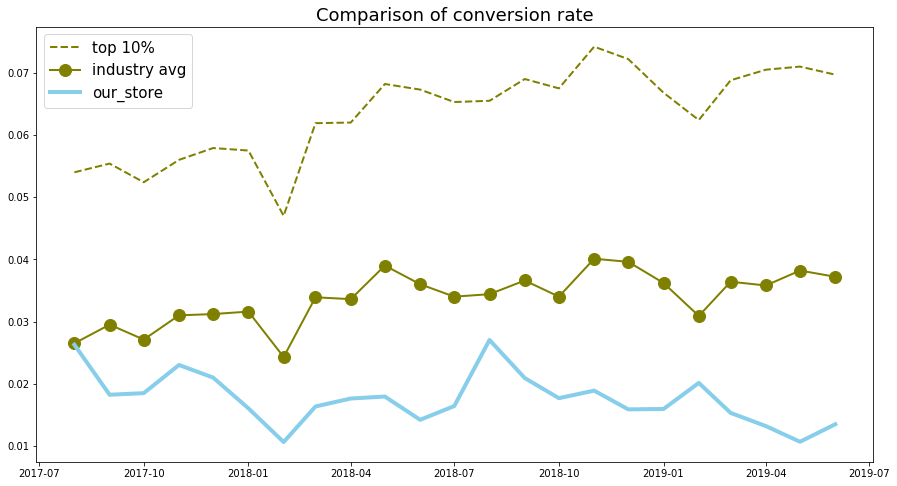

In [705]:
# draw the line of total amount of our 
# Data
df=pd.DataFrame({'x':pd.to_datetime(df4['year_month']), 'y1': df4['excellent_conversion_rate'], 'y2': df4['average_conversion_rate'],'y3':df4[ 'my_conversion_rate']})
 
# multiple line plot
plt.figure(figsize=(15,8))
plt.title('Comparison of conversion rate',fontsize = 18)
plt.plot( 'x', 'y1', data=df, marker='',color='olive',linewidth=2,linestyle='dashed', label="top 10%")
plt.plot( 'x', 'y2', data=df, marker='o', markerfacecolor='olive', markersize=12,color='olive',linewidth=2, label="industry avg")
plt.plot( 'x', 'y3', data=df, marker='', color='skyblue',linewidth=4, label="our_store")
plt.legend(loc='upper left',prop={'size':15})
plt.show()

In [511]:
#寻找和行业差距的比较
df4['gap_to_top'] = (df4['excellent_conversion_rate'] - df4['my_conversion_rate'])/df4['my_conversion_rate']
df4['gap_to_average'] = (df4['average_conversion_rate'] - df4['my_conversion_rate'])/df4['my_conversion_rate']

C:\Users\13917109271\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning:

Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.

C:\Users\13917109271\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning:

Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.



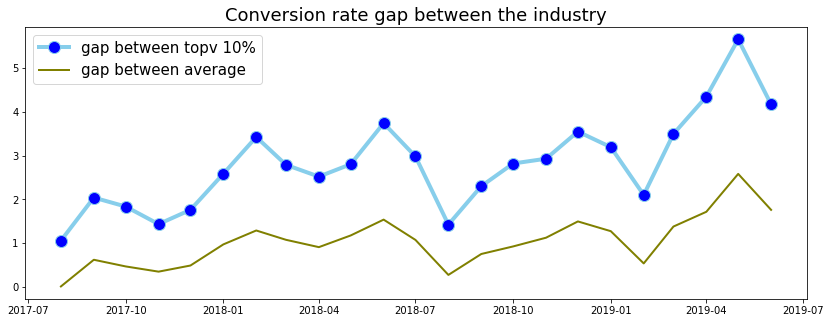

In [558]:
# Data
df=pd.DataFrame({'x':pd.to_datetime(df4['year_month']), 'y1': df4['gap_to_top'], 'y2': df4['gap_to_average']})
 
# multiple line plot
plt.figure(figsize=(14,5))
plt.title('Conversion rate gap between the industry',fontsize = 18)
plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue',linewidth=4, label="gap between topv 10%")
plt.plot( 'x', 'y2', data=df, marker='', color='olive',linewidth=2, label="gap between average")
plt.legend(loc='upper left',prop={'size':15})

plt.show()

In [497]:
#conversion rate 特别低 需要提升 计算break even point

In [521]:
df2["year_month"] = df2.apply(lambda x: x.)
df2.head()

,year_x,month_x,value_x,year_month,year_y,month_y,value_y,OwnedAmount,gap_to_top,gap_to_average,transaction_amount,average_transaction_value
0,2017,8,300766,2017-8,2017,8,213675,543394.30,-0.446505,-0.606777,4709,115.394840
1,2017,9,268919,2017-9,2017,9,180691,225218.86,0.194034,-0.197709,1403,160.526629
2,2017,10,231100,2017-10,2017,10,155361,125806.40,0.836949,0.234921,778,161.704884
3,2017,11,381938,2017-11,2017,11,256130,286356.62,0.333784,-0.105556,1904,150.397384
4,2017,12,323107,2017-12,2017,12,227572,224014.78,0.442347,0.015879,1727,129.713248


In [518]:
df4.head()

,excellent_conversion_rate,year_month,average_conversion_rate,my_view_count,AlipayAccount,conversion_rate,my_conversion_rate,gap_to_top,gap_to_average
0,0.0540,2017-8,0.0265,174213,4577,0.026272,0.026272,1.055386,0.008662
1,0.0554,2017-9,0.0295,75383,1374,0.018227,0.018227,2.039460,0.618485
2,0.0524,2017-10,0.0271,41172,761,0.018483,0.018483,1.834971,0.466178
3,0.0560,2017-11,0.0310,81290,1871,0.023016,0.023016,1.433052,0.346868
4,0.0579,2017-12,0.0312,80056,1680,0.020985,0.020985,1.759073,0.486754


In [548]:
revFrame = df2.merge(df4,on="year_month",how="inner")
revFrame = revFrame.loc[:,['year_month','OwnedAmount','transaction_amount','average_transaction_value','my_view_count','my_conversion_rate',
         'excellent_conversion_rate','average_conversion_rate']]

In [549]:
revFrame["percent_increase"] = revFrame.average_transaction_value * revFrame.my_view_count * 0.01
revFrame["if_average"] = revFrame.average_transaction_value * revFrame.my_view_count * (revFrame.average_conversion_rate - revFrame.my_conversion_rate)

In [706]:
revFrame[["year_month","percent_increase","if_average"]]

,year_month,percent_increase,if_average
0,2017-8,201032.812032,532736.951885
1,2017-9,121009.788477,356978.876008
2,2017-10,66577.134972,180424.035773
3,2017-11,122258.033822,378999.904850
4,2017-12,103843.238145,323990.903013
5,2018-1,141417.493219,446879.278572
6,2018-2,111303.953716,270468.607530
7,2018-3,75912.904576,257344.746513
8,2018-4,68854.338903,231350.578714
9,2018-5,130838.491822,510270.118104


In [664]:
revFrame['if_average'] = revFrame['average_conversion_rate']*revFrame['my_view_count']*revFrame['average_transaction_value']

In [671]:
df8 = pd.merge(df2,revFrame, on ='year_month')

C:\Users\13917109271\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning:

Second argument 'y3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.

C:\Users\13917109271\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning:

Second argument 'y4' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.



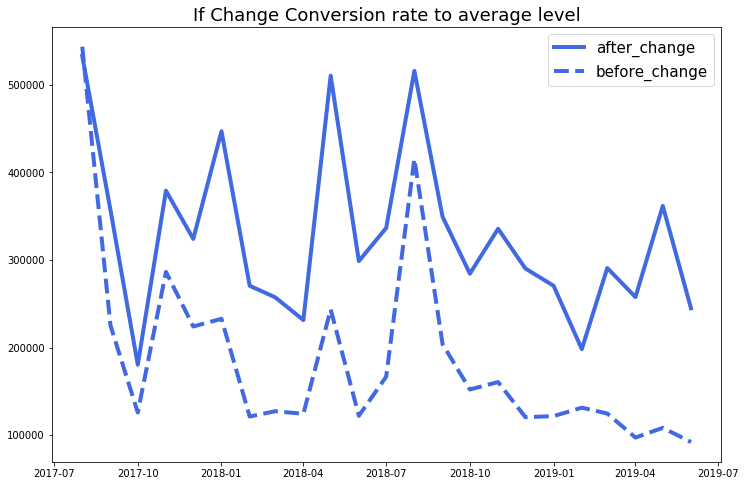

In [711]:
# draw the line of total amount of our 
# Data
df=pd.DataFrame({'x':pd.to_datetime(df8['year_month']), 'y1': df8['value_x'], 'y2': df8['value_y'],'y3':df8[ 'if_average'],'y4':df8['OwnedAmount_x']})
 
# multiple line plot
plt.figure(figsize=(12,8))
plt.title('If Change Conversion rate to average level',fontsize = 18)
plt.plot( 'x', 'y3', data=df, marker='', color='royalblue',linewidth=4, label="after_change")
plt.plot( 'x', 'y4', data=df, marker='', color='royalblue',linestyle='dashed',linewidth=4, label="before_change")
plt.legend(loc='upper right',prop={'size':15})
plt.show()

In [ ]:
# 画conversion rate 和销量的关系， 看conversion rate 每增加多少

In [698]:
revFrame

,year_month,OwnedAmount,transaction_amount,average_transaction_value,my_view_count,my_conversion_rate,excellent_conversion_rate,average_conversion_rate,percent_increase,if_average,profit_percent_increase,gap_to_avg,profit_after_chanegrevFrame,profit_after_change_average
0,2017-8,543394.30,4709,115.394840,174213,0.026272,0.0540,0.0265,201032.812032,532736.951885,2010.328120,0.000228,3250.124081,3250.124081
1,2017-9,225218.86,1403,160.526629,75383,0.018227,0.0554,0.0295,121009.788477,356978.876008,1210.097885,0.011273,1956.381267,1956.381267
2,2017-10,125806.40,778,161.704884,41172,0.018483,0.0524,0.0271,66577.134972,180424.035773,665.771350,0.008617,1076.361353,1076.361353
3,2017-11,286356.62,1904,150.397384,81290,0.023016,0.0560,0.0310,122258.033822,378999.904850,1222.580338,0.007984,1976.561815,1976.561815
4,2017-12,224014.78,1727,129.713248,80056,0.020985,0.0579,0.0312,103843.238145,323990.903013,1038.432381,0.010215,1678.847376,1678.847376
5,2018-1,232775.89,1706,136.445422,103644,0.016045,0.0575,0.0316,141417.493219,446879.278572,1414.174932,0.015555,2286.315331,2286.315331
6,2018-2,121247.70,845,143.488402,77570,0.010623,0.0470,0.0243,111303.953716,270468.607530,1113.039537,0.013677,1799.465752,1799.465752
7,2018-3,127290.80,979,130.021246,58385,0.016340,0.0619,0.0339,75912.904576,257344.746513,759.129046,0.017560,1227.293976,1227.293976
8,2018-4,124336.00,948,131.156118,52498,0.017620,0.0620,0.0336,68854.338903,231350.578714,688.543389,0.015980,1113.177211,1113.177211
9,2018-5,243464.03,1637,148.725736,87973,0.017937,0.0682,0.0390,130838.491822,510270.118104,1308.384918,0.021063,2115.283215,2115.283215


In [699]:
revFrame['profit_percent_increase']= revFrame["percent_increase"]*0.1

In [700]:
revFrame['gap_to_avg'] = revFrame['average_conversion_rate']-revFrame['my_conversion_rate']

In [701]:
mean_value = revFrame['gap_to_avg'].mean()/0.01
# 我们需要平均增加这么多的conversion rate
# 增加之后带来的利润是：
revFrame['profit_after_change_average'] = revFrame['profit_percent_increase'] *mean_value

In [712]:
mean_value

1.6167132359280874

In [715]:
revFrame['my_conversion_rate'].mean()/0.01

1.7619824162458253

In [702]:
revFrame.iloc[5:17,:]['profit_after_change_average'].sum()

193386.5308003457

# 自己销售额同期比较

In [196]:
year_on_year_compare = pd.DataFrame(data[(data['year']>= 2018) & (data['OrderStatus'] == '交易成功')& (data['month']<= 7)])
year_on_year_compare = year_on_year_compare.groupby(['month','year'], as_index=False).agg({'OwnedAmount':'sum'})

In [227]:
year_on_year_compare

,month,year,OwnedAmount
0,1,2018,232775.89
1,1,2019,121704.00
2,2,2018,121247.70
3,2,2019,131347.55
4,3,2018,127290.80
5,3,2019,124651.89
6,4,2018,124336.00
7,4,2019,97224.51
8,5,2018,243464.03
9,5,2019,108321.32


In [206]:
payment_amount_2018 = year_on_year_compare[year_on_year_compare['year'] == 2018].loc[:,'OwnedAmount'].tolist()
payment_amount_2019 = year_on_year_compare[year_on_year_compare['year'] == 2019].loc[:,'OwnedAmount'].tolist()

In [213]:
year_on_year_compare['month'].tolist()

[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7]

C:\Users\13917109271\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



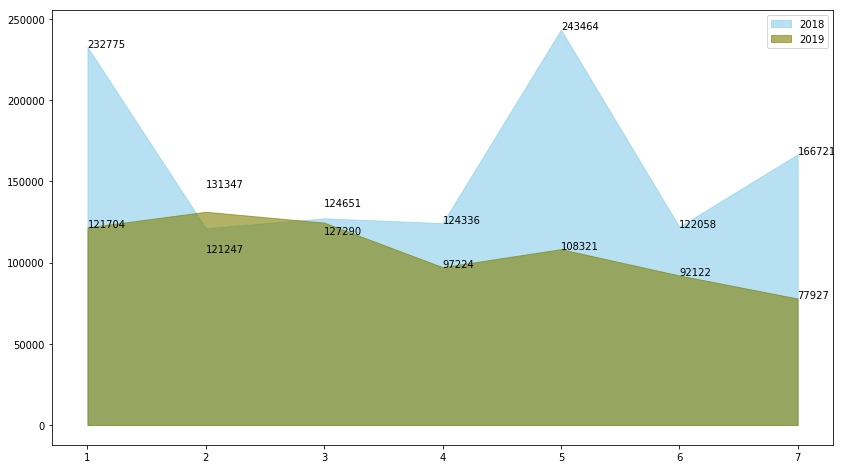

In [286]:
#data
x= range(7)
y=[payment_amount_2018, payment_amount_2019]
 
# use a known color palette (see..)
fig, ax = plt.subplots(1,1, figsize=(14,8))
pal = [ "skyblue","olive"]
i= 0
offset = [0,1.5e4,1e4,0,0,0,0]
for key,group in year_on_year_compare.groupby("year"):
    ax.fill_between(group.month,group.OwnedAmount,alpha=0.6, color=pal[i])
    for o,j in enumerate(group.index):
        ax.annotate(int(group.OwnedAmount[j]),(group.month[j],(group.OwnedAmount[j]+(2*i-1)*offset[o])))
    i += 1
ax.legend(labels = [2018,2019],loc="upper right")
# ax.stackplot(x,y, labels=['2018_payment_amount','2019_payment_amount'], colors=pal, alpha=0.4 )
fig.show()